In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
import glob

In [2]:
df=pd.read_csv('madrid2018.csv',parse_dates=True)
i = 552
df = df.drop(df.index[61:])
   


In [3]:
df.head()


,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,29.0,31.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,NaN,NaN,0.2,NaN,4.0,41.0,47.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,35.0,37.0,54.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,27.0,29.0,49.0,NaN,NaN,3.0,NaN,NaN,28079017


In [4]:
df.tail()


,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
56,2018-03-01 03:00:00,NaN,NaN,0.4,NaN,NaN,3.0,27.0,31.0,33.0,NaN,NaN,6.0,NaN,NaN,28079035
57,2018-03-01 03:00:00,NaN,NaN,0.2,NaN,NaN,1.0,6.0,7.0,NaN,4.0,NaN,6.0,NaN,NaN,28079036
58,2018-03-01 03:00:00,0.3,NaN,NaN,0.3,NaN,1.0,15.0,16.0,NaN,6.0,5.0,3.0,NaN,0.8,28079038
59,2018-03-01 03:00:00,NaN,NaN,0.2,NaN,NaN,1.0,11.0,13.0,74.0,NaN,NaN,NaN,NaN,NaN,28079039
60,2018-03-01 03:00:00,NaN,NaN,NaN,NaN,NaN,1.0,9.0,10.0,NaN,4.0,NaN,5.0,NaN,NaN,28079040


In [5]:
  
for column in df.columns :
     if column != "NO_2" and column !="date" :
        df.drop(column, inplace=True, axis=1)

        
df.set_index('date',inplace=True)


In [6]:
df.head()


,NO_2
date,
2018-03-01 01:00:00,29.0
2018-03-01 01:00:00,40.0
2018-03-01 01:00:00,41.0
2018-03-01 01:00:00,35.0
2018-03-01 01:00:00,27.0


In [7]:

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["NO_2"], inplace=True)
df.columns=["NO2"]
df.head()

,NO2
date,
2018-03-01 01:00:00,29.0
2018-03-01 01:00:00,40.0
2018-03-01 01:00:00,41.0
2018-03-01 01:00:00,35.0
2018-03-01 01:00:00,27.0


In [8]:

df.describe()



,NO2
count,61.000000
mean,23.901639
std,10.623410
min,6.000000
25%,15.000000
50%,24.000000
75%,29.000000
max,57.000000


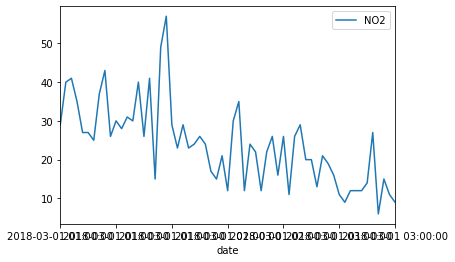

In [9]:
df.plot()


In [10]:

test_result=adfuller(df['NO2'])
 
 

In [11]:

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [12]:
adfuller_test(df['NO2'])


ADF Test Statistic : -2.145913801110447
p-value : 0.2264574594715006
#Lags Used : 2
Number of Observations Used : 58
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
df['NO2 First Difference'] = df['NO2'] - df['NO2'].shift(1)
df['NO2'].shift(1)


date
2018-03-01 01:00:00     NaN
2018-03-01 01:00:00    29.0
2018-03-01 01:00:00    40.0
2018-03-01 01:00:00    41.0
2018-03-01 01:00:00    35.0
2018-03-01 01:00:00    27.0
2018-03-01 01:00:00    27.0
2018-03-01 01:00:00    25.0
2018-03-01 01:00:00    37.0
2018-03-01 01:00:00    43.0
2018-03-01 01:00:00    26.0
2018-03-01 01:00:00    30.0
2018-03-01 01:00:00    28.0
2018-03-01 01:00:00    31.0
2018-03-01 01:00:00    30.0
2018-03-01 01:00:00    40.0
2018-03-01 01:00:00    26.0
2018-03-01 01:00:00    41.0
2018-03-01 01:00:00    15.0
2018-03-01 01:00:00    49.0
2018-03-01 01:00:00    57.0
2018-03-01 01:00:00    29.0
2018-03-01 01:00:00    23.0
2018-03-01 01:00:00    29.0
2018-03-01 02:00:00    23.0
2018-03-01 02:00:00    24.0
2018-03-01 02:00:00    26.0
2018-03-01 02:00:00    24.0
2018-03-01 02:00:00    17.0
2018-03-01 02:00:00    15.0
                       ... 
2018-03-01 02:00:00    12.0
2018-03-01 02:00:00    30.0
2018-03-01 02:00:00    35.0
2018-03-01 02:00:00    12.0
2018-03-01 02:0

In [14]:
df['Seasonal First Difference']=df['NO2']-df['NO2'].shift(12)
 


In [15]:
df.head(14)


,NO2,NO2 First Difference,Seasonal First Difference
date,,,
2018-03-01 01:00:00,29.0,NaN,NaN
2018-03-01 01:00:00,40.0,11.0,NaN
2018-03-01 01:00:00,41.0,1.0,NaN
2018-03-01 01:00:00,35.0,-6.0,NaN
2018-03-01 01:00:00,27.0,-8.0,NaN
2018-03-01 01:00:00,27.0,0.0,NaN
2018-03-01 01:00:00,25.0,-2.0,NaN
2018-03-01 01:00:00,37.0,12.0,NaN
2018-03-01 01:00:00,43.0,6.0,NaN


In [16]:

adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -7.366521863610834
p-value : 9.205664959414686e-11
#Lags Used : 11
Number of Observations Used : 37
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


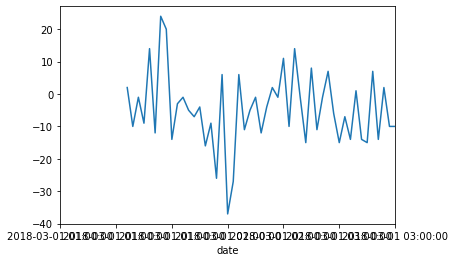

In [17]:
df['Seasonal First Difference'].plot()


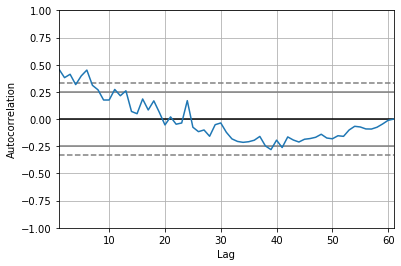

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['NO2'])
plt.show()

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


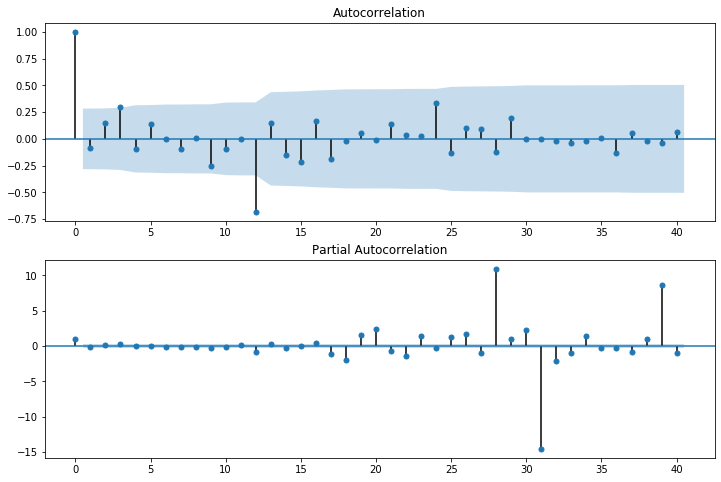

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [21]:
from statsmodels.tsa.arima_model import ARIMA


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning 

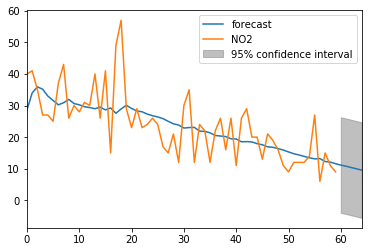

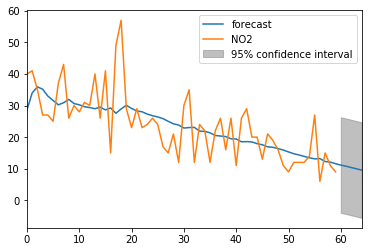

In [26]:
model=ARIMA(df['NO2'],order=(1,1,1))
model_fit=model.fit()
results = model.fit(disp=-1)
results.plot_predict(1,65)